# Import Libraries
#### Usually we start by importing the common libraries at the start

In [1]:
import os
import re
import sys
import time
import datetime
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
color = sns.color_palette()
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from pylab import rcParams
# figure size in inches

# Import Dataset

In [3]:
%cd C:\Users\Jennifer\Desktop\class\python\group project

C:\Users\Jennifer\Desktop\class\python\group project


In [4]:
app=pd.read_csv("googleplaystore.csv")
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
review=pd.read_csv("googleplaystore_user_reviews.csv")
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Data Exploration

In [8]:
print(app.shape[0:2])
print(review.shape[0:2])
####CHECK THE SHAPE OF OUR DATASETS
###FOR APP DATA WE HAVE 10841 RECORDS WITH 13 COLUMNS
###FOR REVIEW DATA WE AHVE 64295 RECORDS WITH 5 COLUMNS

(10841, 13)
(64295, 5)


In [9]:
print(app.isnull().values.any(),review.isnull().values.any())
###CHECK IF THERE IS ANY NAN VALUE

True True


In [10]:
print(app.isnull().any(),'\n',review.isnull().any())
##CHECK WHICH COLUMNS HAVE NAN VALUE

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool 
 App                       False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool


In [11]:
print(app.duplicated().any(),review.duplicated().any())
####CHECK DUPLICATED RECORDS

True True


In [12]:
app[app.duplicated()==True].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [13]:
app.Rating.value_counts()
##THERE IS A 19.0 RATING WHICH DODES NOT MAKE ANY SENSE THUS WE DROPPED IT

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [14]:
app[app['Rating']==19.0]
# TAKE A LOOK AT THE UNUSUAL DATA RECORD

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
app= app.drop(app.index[10472])
app.Rating.describe()
###HERE WE GET RATING FROM 0 TO 5 RANGE WITHOUT OUTLIE

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [16]:
app = app.drop_duplicates()
###DROP DUPLICATES FOR APP DATASET
app.duplicated().any()

False

In [17]:
review = review.drop_duplicates()
###DROP DUPLICATES FOR REVIEW DATASET
review.duplicated().any()

False

In [18]:
print(app.shape[0:2])
print(review.shape[0:2])
###CHECK OUT THE SHAPE AFTER DROPPING DUPLICATES

(10357, 13)
(30679, 5)


In [19]:
app = app.dropna()
review = review.dropna()
##DROP NAN VALUES HERE

In [20]:
print(app.shape[0:2], review.shape[0:2])

(8886, 13) (29692, 5)


In [21]:
app.groupby('Category')['Rating'].count()
###FOR EACH CATEGORY, COUNT NUMBER OF RECORDS

Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     177
BUSINESS                270
COMICS                   58
COMMUNICATION           307
DATING                  159
EDUCATION               129
ENTERTAINMENT           111
EVENTS                   45
FAMILY                 1717
FINANCE                 317
FOOD_AND_DRINK          106
GAME                   1074
HEALTH_AND_FITNESS      262
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
LIFESTYLE               305
MAPS_AND_NAVIGATION     124
MEDICAL                 302
NEWS_AND_MAGAZINES      214
PARENTING                50
PERSONALIZATION         308
PHOTOGRAPHY             304
PRODUCTIVITY            334
SHOPPING                202
SOCIAL                  244
SPORTS                  286
TOOLS                   733
TRAVEL_AND_LOCAL        205
VIDEO_PLAYERS           160
WEATHER                  75
Name: Rating, dtype: int64

In [22]:
app.groupby('Category')['Rating'].mean()
##FOR EACH CATEGORY, GET THE AVG RATINGS.

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191264
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333117
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.094146

In [23]:
app.groupby('Genres')['Rating'].mean().head(10)
###WE CAN GET AVG RATINGS FOR DIFFERENT GENRES AS WELL

Genres
Action                          4.279370
Action;Action & Adventure       4.313333
Adventure                       4.180822
Adventure;Action & Adventure    4.423077
Adventure;Brain Games           4.600000
Adventure;Education             4.100000
Arcade                          4.301951
Arcade;Action & Adventure       4.350000
Arcade;Pretend Play             4.500000
Art & Design                    4.380000
Name: Rating, dtype: float64

In [24]:
app['Content Rating'].value_counts()
##GET CONTENT RATINGs OF APP TYPE

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [25]:
app.groupby('Content Rating')['Rating'].mean()
###AVG RATING FOR DIFFERENT CONTENTS

Content Rating
Adults only 18+    4.300000
Everyone           4.180914
Everyone 10+       4.254167
Mature 17+         4.124331
Teen               4.238845
Unrated            4.100000
Name: Rating, dtype: float64

In [26]:
app.Type.value_counts()
###CHECK TYPE : FREE OR PAID

Free    8275
Paid     611
Name: Type, dtype: int64

In [27]:
app.groupby('Type')['Rating'].mean()
###PAID APP ON AVG GETS HIGHER RATE

Type
Free    4.182514
Paid    4.261702
Name: Rating, dtype: float64

In [28]:
###NOW LETS INSPECT REVIEW DATA
review.describe().transpose()
###SUMMARY ON REVIEW DATA

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,29692.0,0.188868,0.355694,-1.0,0.00,0.157143,0.422917,1.0
Sentiment_Subjectivity,29692.0,0.490930,0.265976,0.0,0.35,0.514286,0.652703,1.0


In [29]:
review.groupby('Sentiment')['App'].count()
####DIFFERENT SENTIMENT

Sentiment
Negative     6321
Neutral      4356
Positive    19015
Name: App, dtype: int64

In [30]:
review.groupby('App')['Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values('Sentiment_Subjectivity',ascending=False).head()
###DIFFERENT APPS WITH DIFFERENT SENTIMENT POLARITY AND SUBJECTIVITY

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Choice Hotels,0.298790,0.719206
HTC Calendar,-0.037626,0.694949
Hitwe - meet people and chat,-0.139456,0.694105


In [31]:
review.groupby('Sentiment')['Sentiment_Polarity'].mean()
###SENTIMENT POLARITIES ARE CONSISTENT WITH SENTIMENT--OF COURSE

Sentiment
Negative   -0.263659
Neutral     0.000000
Positive    0.382564
Name: Sentiment_Polarity, dtype: float64

In [32]:
review.groupby('Sentiment')['Sentiment_Subjectivity'].mean()
###BOTH NEGATIVE AND POSITIVE REVIEWS ARE MORE SUBJECTIVE THAN NEUTRAL REVIEWS
###POSITIVE REVIEWS ARE SLIGHTLY MORE SUBJECTIVE

Sentiment
Negative    0.537778
Neutral     0.077315
Positive    0.570109
Name: Sentiment_Subjectivity, dtype: float64

# Visulization
## Visulization of App

In [33]:
app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
color = sns.color_palette()

In [35]:
avg_rate_data = [go.Histogram(
        x = app.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating:', np.mean(app['Rating']))
py.offline.iplot(avg_rate_data, filename='rating_dist')

Average app rating: 4.187958586540634


In [36]:
app.Category.nunique()

33

In [37]:
app.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [38]:
category_list = list(app.Category.unique())
ratings = []

for category in category_list:
    x = app[app.Category == category]
    rating_rate = x.Rating.sum()/len(x)
    ratings.append(rating_rate)
data = pd.DataFrame({'Category':category_list, 'Rating':ratings})
new_index = (data['Rating'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,Category,Rating
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.377049
8,EDUCATION,4.375969
3,BOOKS_AND_REFERENCE,4.347458
26,PERSONALIZATION,4.333117
28,PARENTING,4.300000
17,GAME,4.281285
2,BEAUTY,4.278571
13,HEALTH_AND_FITNESS,4.261450
20,SOCIAL,4.254918


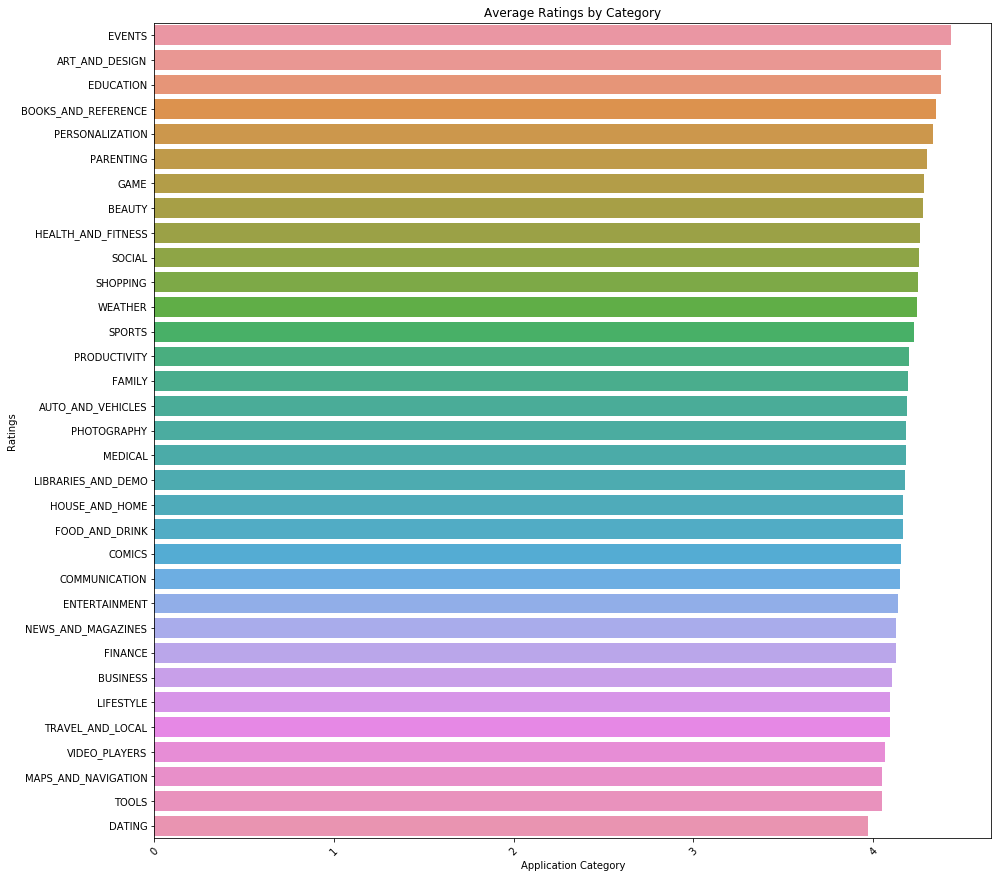

In [39]:
plt.figure(figsize=(15,15))
sns.barplot(y=sorted_data.Category, x=sorted_data.Rating)

plt.xticks(rotation = 45)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category')
plt.show()

#### Average ratings by categories shows that different types of apps have similiar ratings, the range is between 3.97 and 4.44. Events, Art&Design, Education apps have the highest rating, while Dating, Tools, Maps&Navigation apps have the lowest ratings.

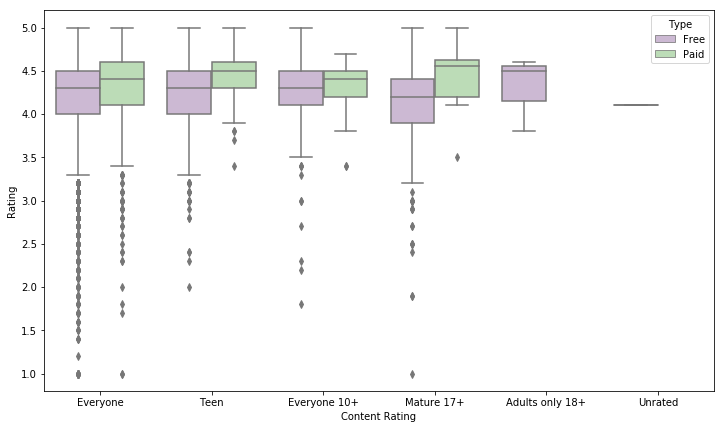

In [40]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=app, palette='PRGn')
plt.show()

#### From the graph above, we find out that Paid apps in general have higher rating than free apps. Also, apps that are avaliable to different age groups have similar ratings. Most apps in the Google Play Store are for all age groups, there are no paid apps that are only for Adults 18+ users.

Text(0.5, 1.0, 'Count of app in each category')

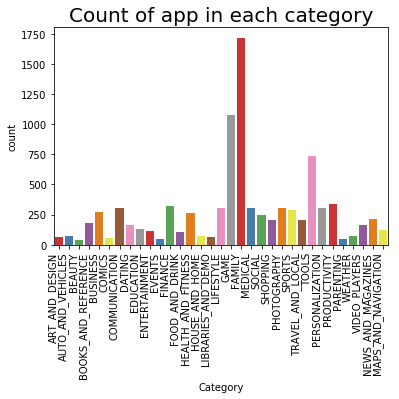

In [41]:
g = sns.countplot(x="Category",data=app, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

#### From the graphy above, we found out that the top three amount of apps in google play store are Family,Game and personalization apps. Family apps have more than 1600 counts. The number of Beauty apps is the smallest in the google play store.

Text(0.5, 1.0, 'Distribution of Reveiw')

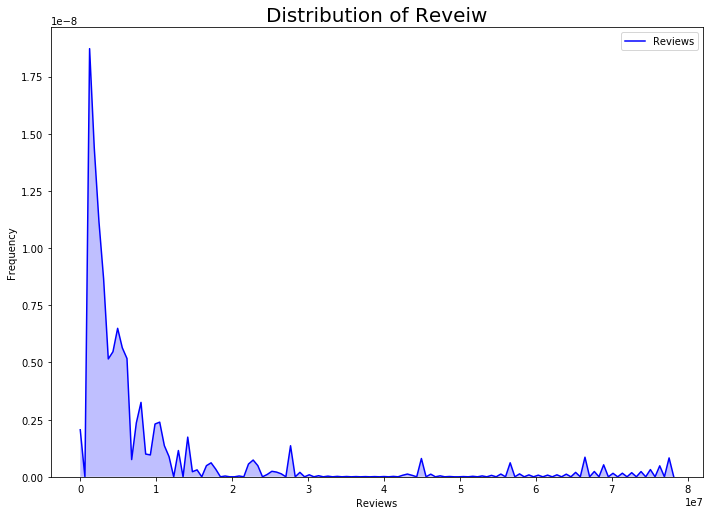

In [42]:
# convert to int

app['Reviews'] = app['Reviews'].apply(lambda x: int(x))

# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(app.Reviews, color="Blue", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

#### From the above graph, we find out that most apps in this store have less than 1M in reviews. The distribution of number of reviews is heavily skewed to the right.

Text(0.5, 1.0, 'Rating VS Reveiws')

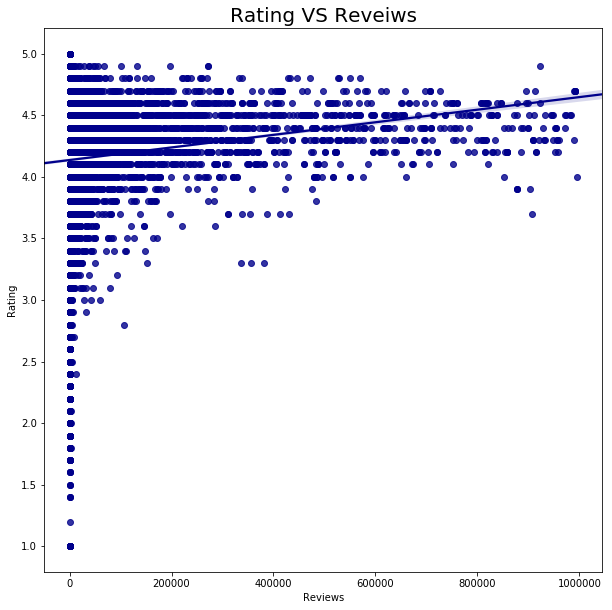

In [43]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkblue',data=app[app['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

#### From the graph above, we found that if there are more reviews of one app, the app tends to have higher ratings. There is a positive correlation between two variables.

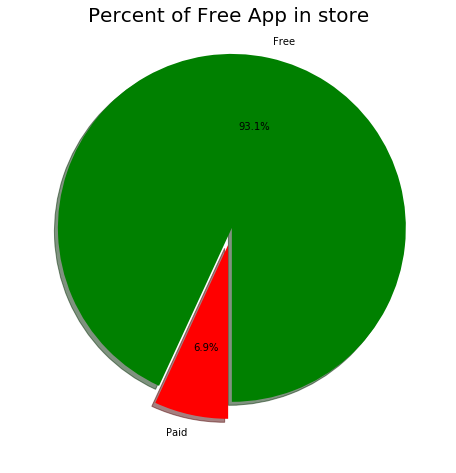

In [44]:
labels =app['Type'].value_counts(sort = True).index
sizes = app['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors='green',
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

#### From the graph above, we found that there are only 6.9% paid apps, where the other 93.1% apps in the google play store are free apps.

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

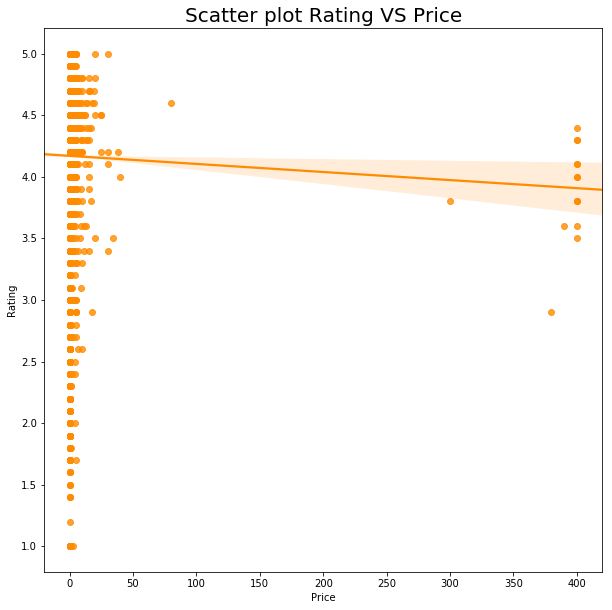

In [45]:
app.Price = app.Price.apply(lambda x: x.replace('$',''))
app['Price'] = app['Price'].apply(lambda x: float(x))

plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=app[app['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

#### From the graph above, we think there is a negative correlation between the price and the ratings.

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

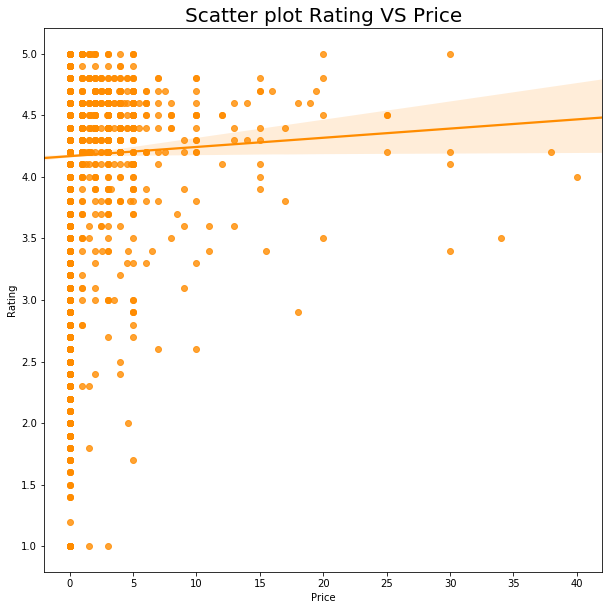

In [46]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=app[(app['Reviews']<1000000) & (app['Price']<50)]);
plt.title('Scatter plot Rating VS Price',size = 20)

## Visulization of Reviews

In [47]:
review1=pd.concat([review.Translated_Review,review.Sentiment],axis=1)
review1.dropna(axis=0,inplace=True)  # For drop nan values. It makes confuse for our model.
review1.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


In [48]:
review.Sentiment.unique() 

array(['Positive', 'Neutral', 'Negative'], dtype=object)

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64


Text(0.5, 1.0, 'Count of Sentiments')

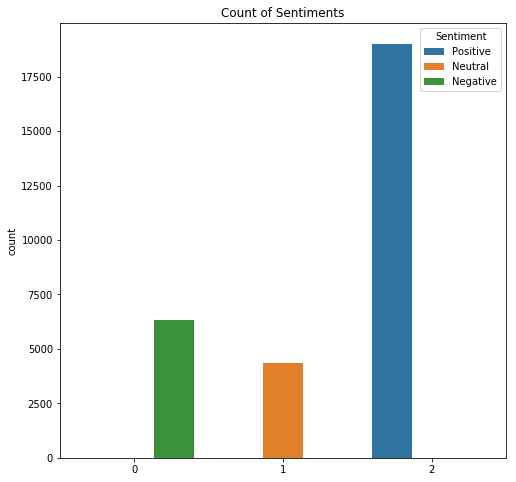

In [49]:
#Encode class label
classes = review['Sentiment']
print(classes.value_counts())
encoder = LabelEncoder()
senti_en = encoder.fit_transform(classes)

#visualization
sns.countplot(senti_en,hue=review['Sentiment'])
plt.title("Count of Sentiments")

#### From the graph above, we found that there are in general more positive reviews than negative or neutral reviews for the apps.

In [50]:
review.Sentiment.value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

In [51]:
#Last Update
app['new'] = pd.to_datetime(app['Last Updated'])
app['new'].describe()

count                    8886
unique                   1299
top       2018-08-03 00:00:00
freq                      291
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

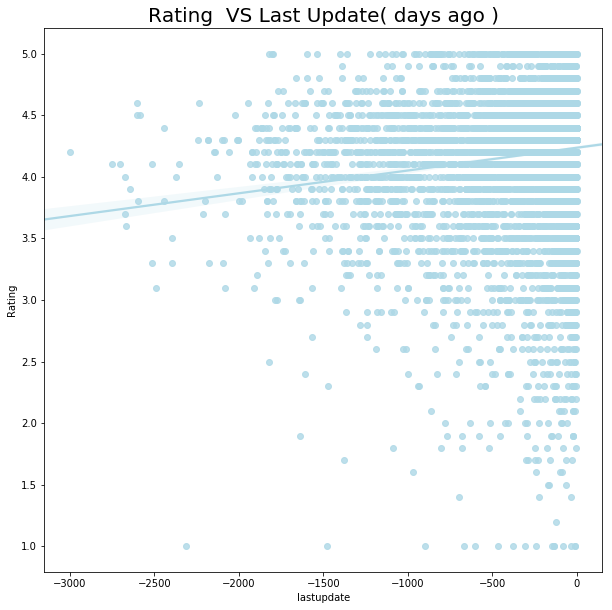

In [52]:
app['lastupdate'] = (app['new'] -  app['new'].max()).dt.days
app['lastupdate'].head()
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightblue',data=app );
plt.title('Rating  VS Last Update( days ago )',size = 20)

In [53]:
app1=app.pivot_table('Rating',index=['Category'],aggfunc=['min','max','mean','count']).reset_index()
app1.columns=['Category','min_Rating','max_Rating','mean_Rating','count_Rating']
display(app1.sort_values(by='mean_Rating',ascending=False))

,Category,min_Rating,max_Rating,mean_Rating,count_Rating
10,EVENTS,2.9,5.0,4.435556,45
0,ART_AND_DESIGN,3.4,5.0,4.377049,61
8,EDUCATION,3.5,4.9,4.375969,129
3,BOOKS_AND_REFERENCE,2.7,5.0,4.347458,177
23,PERSONALIZATION,2.5,5.0,4.333117,308
22,PARENTING,2.0,5.0,4.300000,50
14,GAME,1.0,5.0,4.281285,1074
2,BEAUTY,3.1,4.9,4.278571,42
15,HEALTH_AND_FITNESS,1.4,5.0,4.261450,262
27,SOCIAL,1.9,5.0,4.254918,244


### Pivot Table

In [54]:
app['Price'] = app['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
app['Price'] = app['Price'].apply(lambda x: float(x))

In [55]:
app2=app.pivot_table('Price',index=['Category'],aggfunc=['min','max','mean']).reset_index()
app2.columns=['Category','min_Price','max_Price','mean_Price']
display(app2.sort_values(by='mean_Price',ascending=False))

,Category,min_Price,max_Price,mean_Price
12,FINANCE,0.0,399.99,7.696751
18,LIFESTYLE,0.0,400.00,6.429115
20,MEDICAL,0.0,79.99,2.148543
11,FAMILY,0.0,399.99,1.328940
23,PERSONALIZATION,0.0,9.99,0.401883
32,WEATHER,0.0,6.99,0.392400
28,SPORTS,0.0,29.99,0.325909
29,TOOLS,0.0,14.99,0.283629
14,GAME,0.0,17.99,0.261043
24,PHOTOGRAPHY,0.0,19.99,0.250855


# Text Mining & Sentiment Analysis

In [56]:
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


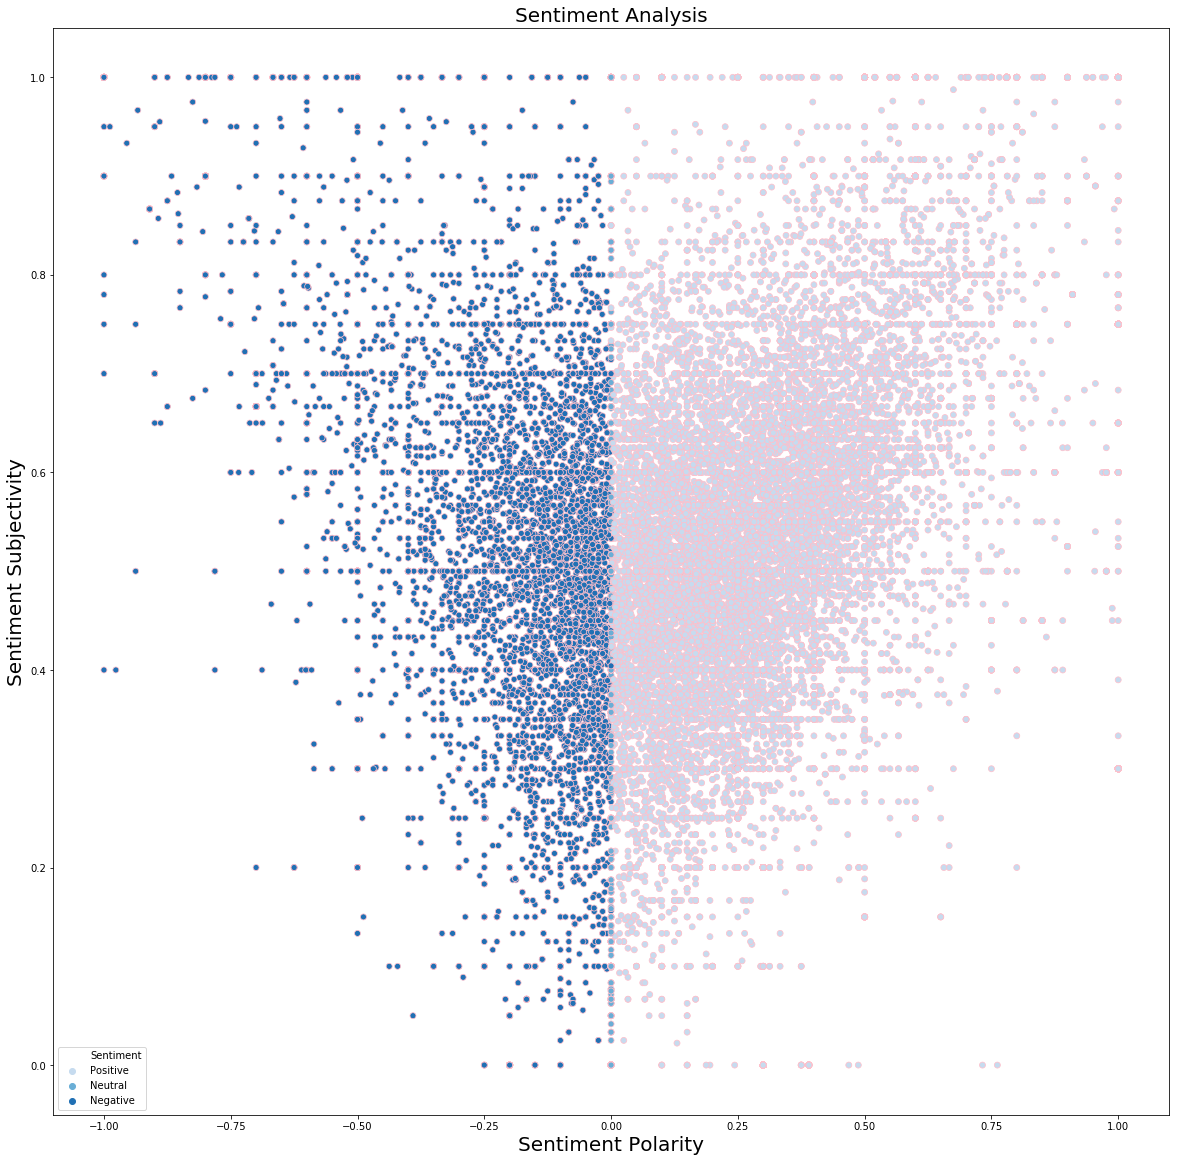

In [57]:
#Display the scatter of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(20,20))
j = sns.scatterplot(review['Sentiment_Polarity'],review['Sentiment_Subjectivity'],hue=review['Sentiment'],palette="Blues",edgecolor='pink')
plt.xlabel('Sentiment Polarity',fontsize=20)
plt.ylabel('Sentiment Subjectivity',fontsize=20)
plt.title("Sentiment Analysis",fontsize=20)
plt.show()

In [58]:
#Filter expressions & Remove stop words from reviews

#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#Remove bad symbols
review_p = review['Translated_Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',' ')
review_p = review_p.str.replace(r'[^\w\d\s]', ' ')
review_p = review_p.str.replace(r'\s+', ' ')
review_p = review_p.str.replace(r'^\s+|\s+?\'$', ' ')
review_p = review_p.str.replace(r'\d+',' ')
review_p = review_p.str.lower()
review_p = review_p.apply(lambda x: ' '.join(
    s for s in x.split() if s not in stop_words))

#Create bag-of-words
all_words = []
for m in review_p:
    words = word_tokenize(m)
    for w in words:
        all_words.append(w)
all_words = nltk.FreqDist(all_words)
all_words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 19947
Most common words: [('game', 6443), ('good', 4123), ('like', 4111), ('app', 3981), ('great', 3786), ('love', 3545), ('get', 3464), ('time', 3377), ('would', 2492), ('really', 2338), ('even', 2153), ('update', 1971), ('phone', 1948), ('work', 1829), ('please', 1794)]


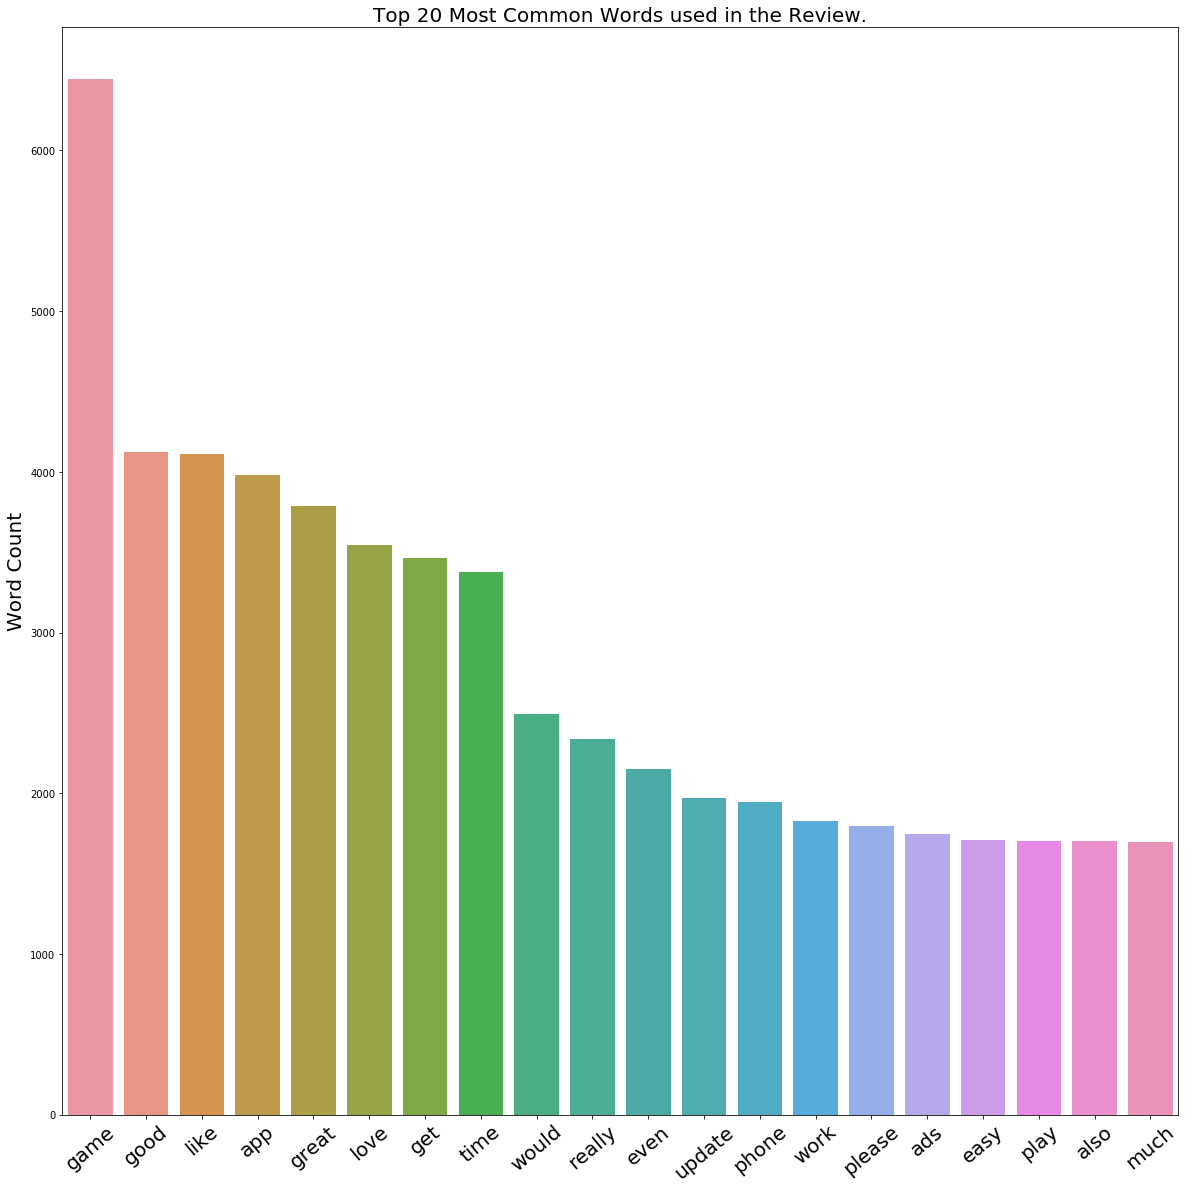

In [59]:
#Display the top 20 most common words in the reviews
from collections import Counter
wordcount=Counter(all_words)
mcwords=sorted(wordcount.items(), key=lambda x: x[1], reverse=True)
mcwordList=[]
mcCountList=[]
for x, y in mcwords:
    mcwordList.append(x)
    mcCountList.append(y)
    
plt.figure(figsize=(20,20))
plot = sns.barplot(np.arange(20), mcCountList[0:20]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20), mcwordList[0:20], fontsize=20, rotation=40)
plt.title('Top 20 Most Common Words used in the Review.',fontsize=20)
plt.show()

In [60]:
all_words = nltk.FreqDist(all_words)
#Using the 3000 words as features
word_f = list(all_words.keys())[:3000]

def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_f:
        features[word] = (word in words)
    return features
#Determine the 3000 word features contained in each review
messages = list(zip(review_p, senti_en))
print("Testing(Unification of reviews and labels):", messages[0])

Testing(Unification of reviews and labels): ('like eat delicious food cooking food case best foods helps lot also best shelf life', 2)


In [61]:
#Find 3000 word features contained for each review
feature_set = [(find_features(text), label) for (text, label) in messages]

In [62]:
#Split the data into training(75%) and testing(25%) datasets by random sampling
train, test = model_selection.train_test_split(feature_set, test_size = 0.25, random_state=10)
model = MultinomialNB()

#Train the model on the training data and calculating accuracy
nltk_model = SklearnClassifier(model)
nltk_model.train(train)
accuracy = nltk.classify.accuracy(nltk_model, test)*100
print(format(accuracy))

#Get the predicted labels for testing dataset
txt_features,labels = list(zip(*test))
prediction = nltk_model.classify_many(txt_features)

76.06089182271319


In [63]:
# Negative/Neutral/Positive reviews
neu=[];
neg=[];
pos=[];
unifyy = list(zip(prediction, txt_features, labels))
for p, t, l in unifyy:
    for key, value in t.items():
        if value==True and l==p==0:
            neg.append(key)
            break
        elif value==True and l==p==1:
            neu.append(key)
            break
        elif value==True and l==p==2:
            pos.append(key)
            break
print("Negative Words:",neg)
print("Neutral Words:",neu)
print("Positive Words:",pos)
print(classification_report(labels, prediction))

Negative Words: ['life', 'also', 'get', 'stars', 'make', 'also', 'get', 'game', 'app', 'please', 'add', 'ad', 'app', 'help', 'first', 'much', 'game', 'downloaded', 'app', 'store', 'pictures', 'well', 'information', 'also', 'like', 'update', 'also', 'also', 'waste', 'bad', 'life', 'app', 'get', 'difficult', 'good', 'love', 'like', 'ads', 'please', 'good', 'get', 'ever', 'disappointed', 'ads', 'ads', 'work', 'like', 'get', 'update', 'said', 'every', 'month', 'ever', 'information', 'get', 'ads', 'waste', 'get', 'way', 'app', 'like', 'like', 'also', 'works', 'addicted', 'hard', 'get', 'waste', 'find', 'regular', 'way', 'bad', 'get', 'like', 'two', 'help', 'forward', 'like', 'never', 'phone', 'simply', 'super', 'even', 'time', 'get', 'good', 'works', 'way', 'good', 'time', 'needs', 'work', 'book', 'absolutely', 'going', 'awesome', 'terrible', 'ever', 'unable', 'store', 'get', 'get', 'u', 'make', 'help', 'good', 'must', 'bad', 'like', 'know', 'never', 'also', 'app', 'good', 'get', 'works', '

In [64]:
#Display the False positives and True positives in confusion matrix
df = pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual', 'actual'], ['Negative','Neutral', 'Positive']],
    columns = [['predicted', 'predicted', 'predicted'], ['Negative','Neutral', 'Positive']])
print(df)

                predicted                 
                 Negative Neutral Positive
actual Negative      1021     105      432
       Neutral         58     339      656
       Positive       389     137     4286


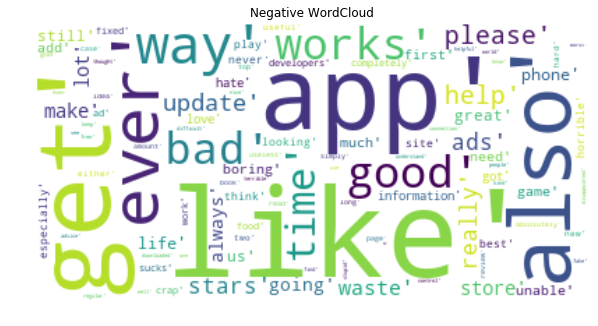

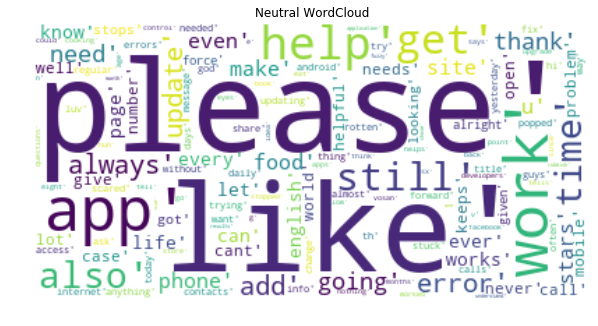

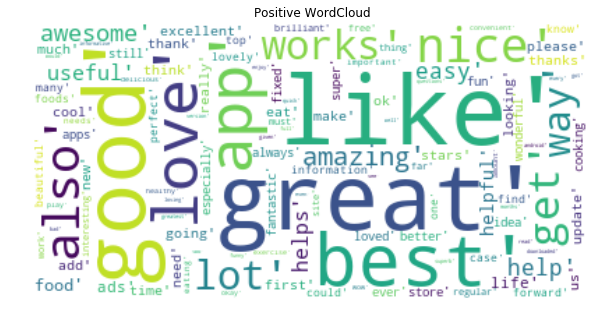

In [65]:
#Generate wordcloud for Negative, Neutral, and Positive words
plt.figure(figsize=(10,10))
negative = str(neg)
wordCloud = WordCloud(background_color="white").generate(negative)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative WordCloud')
plt.show()

plt.figure(figsize=(10,10))
neutral = str(neu)
wordCloud = WordCloud(background_color="white").generate(neutral)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral WordCloud')
plt.show()

plt.figure(figsize=(10,10))
positive = str(pos)
wordCloud = WordCloud(background_color="white").generate(positive)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive WordCloud')
plt.show()

# Data Processing for Prediction
#### Check if there is any null value

In [66]:
app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
new               0
lastupdate        0
dtype: int64

#### In the future, I might discover more ways to use dummy variables to deal with categorical variables in order to improve accuracy. But this time I converted each category into an individual number.

In [67]:
CategoryString = app['Category']
categoryVal = app['Category'].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range (0,categoryValCount):
    category_dict[categoryVal[i]] = i
app['Category_c'] = app['Category'].map(category_dict).astype(int)

#### Scaling and cleaning size of installation 

In [68]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size [:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
app['Size'] = app['Size'].map(change_size)

#### filling Size which had NA

In [69]:
app.Size.fillna(method = 'ffill', inplace = True)

#### Cleaning no of installs classification

In [70]:
app['Installs'] = [int(i[:-1].replace(',',''))for i in app['Installs']]

#### Converting Type classification into binary

In [71]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1
app['Type'] = app['Type'].map(type_cat)

#### Converting the content rating section into integers

In [72]:
RatingL = app['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
app['Content Rating'] = app['Content Rating'].map(RatingDict).astype(int)

#### Dropping unnecessary columns

In [73]:
app.drop(labels = ['Last Updated','Current Ver','Android Ver','App'],axis = 1, inplace = True)

#### Generally speaking, one-hot should also be applied in this instance. However, since it's a subset of the categorical column, and application of a dummy variable would significantly increase the number of independent variables, I didnn't do it. Instead, I ran two seperate regressions, one including and one excluding such genre data. When including the data, I only considered in the impact/information provided via the genre section purely based on it's numeric value.

In [74]:
GenresL = app.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
app['Genres_c'] = app['Genres'].map(GenresDict).astype(int)

#### Converting the number reviews column into integers

In [75]:
app['Reviews'] = app['Reviews'].astype(int)

In [76]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
Category          8886 non-null object
Rating            8886 non-null float64
Reviews           8886 non-null int32
Size              8886 non-null float64
Installs          8886 non-null int64
Type              8886 non-null int64
Price             8886 non-null float64
Content Rating    8886 non-null int32
Genres            8886 non-null object
new               8886 non-null datetime64[ns]
lastupdate        8886 non-null int64
Category_c        8886 non-null int32
Genres_c          8886 non-null int32
dtypes: datetime64[ns](1), float64(3), int32(4), int64(3), object(2)
memory usage: 1.1+ MB


In [77]:
app.drop(labels = ['new'],axis = 1, inplace = True)

#### For dummy variable encoding for Categories

In [78]:
app2 = pd.get_dummies(app, columns=['Category'])

In [79]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 44 columns):
Rating                          8886 non-null float64
Reviews                         8886 non-null int32
Size                            8886 non-null float64
Installs                        8886 non-null int64
Type                            8886 non-null int64
Price                           8886 non-null float64
Content Rating                  8886 non-null int32
Genres                          8886 non-null object
lastupdate                      8886 non-null int64
Category_c                      8886 non-null int32
Genres_c                        8886 non-null int32
Category_ART_AND_DESIGN         8886 non-null uint8
Category_AUTO_AND_VEHICLES      8886 non-null uint8
Category_BEAUTY                 8886 non-null uint8
Category_BOOKS_AND_REFERENCE    8886 non-null uint8
Category_BUSINESS               8886 non-null uint8
Category_COMICS                 8886 non-null uint8
C

# Prediction - First Try

#### Y: the rating of the apps (continuous variable)
#### Model: 3 most common models - Linear Regression, SVR, Random Forest Tree
#### Evaluation: Comparison the predicted results against the actual results, and use the mean squared error, mean absolute error and mean squared log error as possible benchmarks
#### Start by useing 3 different regression models with two different techniques on treating the categorical variable

## Linear Regression
### Linear Regression EXCLUDING Genre label

#### To obtain the error terms for the various models, for comparability

In [81]:
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean Absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean Squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

#### To add into results_index for evaluation of error term

In [82]:
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

#### Integer encoding

In [83]:
X = app.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [84]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 2.84%'

#### Creation of results dataframe and addition of first entry

In [85]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#### dummy encoding

In [86]:
X_d = app2.drop(labels = ['Rating','Genres', 'Category_c', 'Genres_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

In [87]:
accuracy = model_d.score(X_test_d,y_test_d)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 5.67%'

#### adding results into results dataframe

In [88]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

#### plot

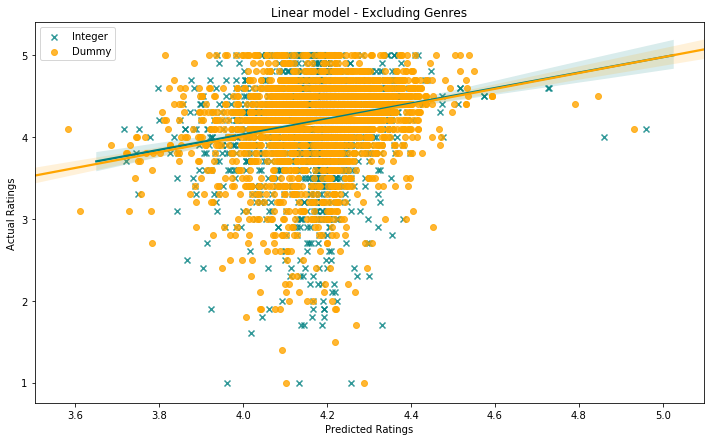

In [89]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [90]:
print('Actual mean of population:'+ str(y.mean()))
print('Integer encoding(mean):' + str(Results.mean()))
print('Dummy encoding(mean):' + str(Results_d.mean()))
print('Integer encoding(std):' + str(Results.std()))
print('Dummy encoding(std):' + str(Results_d.std()))

Actual mean of population:4.187958586540634
Integer encoding(mean):4.180763960833041
Dummy encoding(mean):4.187221206711297
Integer encoding(std):0.09404716391996731
Dummy encoding(std):0.1262213744222107


#### The dummy encoded results have a much larger standard deviation as compared to the integer encoded model
### Linear Regression INCLUDING genre label as a numeric value

In [91]:
X = app.drop(labels = ['Category', 'Rating', 'Genres'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 3.48%'

#### adding results into results dataframe

In [93]:
Results = model.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test, Results, name = 'Linear(inc Genre) - Integer'), ignore_index = True)

#### dummy encoding

In [94]:
X_d = app2.drop(labels = ['Rating','Genres', 'Category_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)

In [95]:
accuracy = model_d.score(X_test_d,y_test_d)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 4.86%'

#### plot

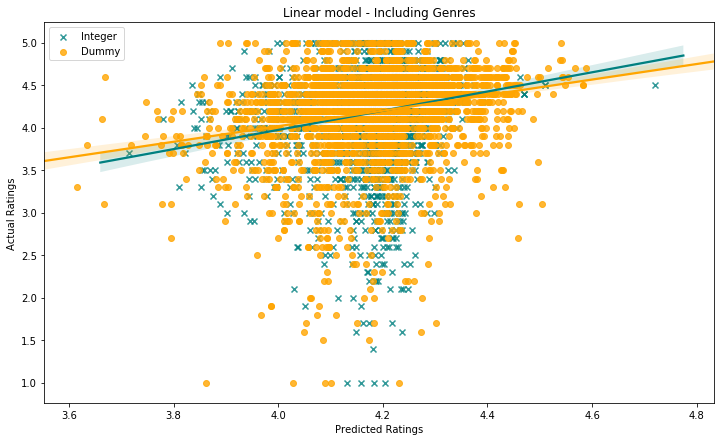

In [96]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [97]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.186611295150665
Dummy encoding(mean) :4.185060265842692
Integer encoding(std) :0.08648941722246534
Dummy encoding(std) :0.12781614923084825


#### There is a slight difference in the mean between the integer and dummy encoded linear models. The dummy encoded model's std is still higher than the integer encoded model.

## SVR model
### EXCLUDING genres

#### Integer encoding

In [98]:
X = app.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model2 = svm.SVR()
model2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
accuracy = model2.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.47%'

#### adding results into results dataframe

In [100]:
Results2 = model2.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#### dummy based

In [101]:
X_d = app2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)
Results2_d = model2.predict(X_test_d)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

In [102]:
accuracy = model2.score(X_test_d,y_test_d)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.76%'

#### plot

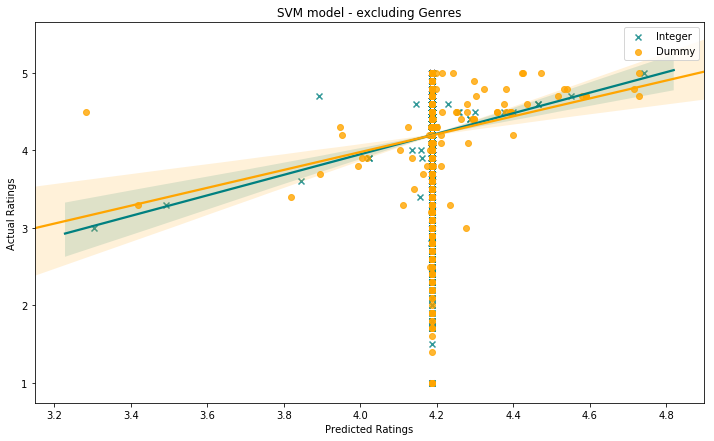

In [103]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [104]:
print ('Integer encoding(mean) :' + str(Results2.mean()))
print ('Dummy encoding(mean) :'+ str(Results2_d.mean()))
print ('Integer encoding(std) :' + str(Results2.std()))
print ('Dummy encoding(std) :'+ str(Results2_d.std()))

Integer encoding(mean) :4.187219275456768
Dummy encoding(mean) :4.188863355435651
Integer encoding(std) :0.029018312931766016
Dummy encoding(std) :0.04006971449448356


#### This prediction model consider the ratings to be approximately at 4.2, even though the actual ratings were not. It seems like the integer encoded model performs better. Here, the dummy encoded model has a higher std than the integer encoded model.
### INCLUDING genres
#### Integer encoding

In [105]:
model2a = svm.SVR()
X = app.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model2a.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
accuracy = model2a.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.65%'

#### adding results into results dataframe

In [107]:
Results2a = model2a.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'SVM(inc Genres) - Integer'),ignore_index = True)

#### dummy encoding, including Genres_c

In [108]:
model2a = svm.SVR()
X_d = app2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model2a.fit(X_train_d,y_train_d)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
accuracy = model2a.score(X_test_d,y_test_d)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.68%'

#### adding results into results dataframe

In [110]:
Results2a_d = model2a.predict(X_test_d)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2a_d, name = 'SVM(inc Genres) - Dummy'),ignore_index = True)

#### plot

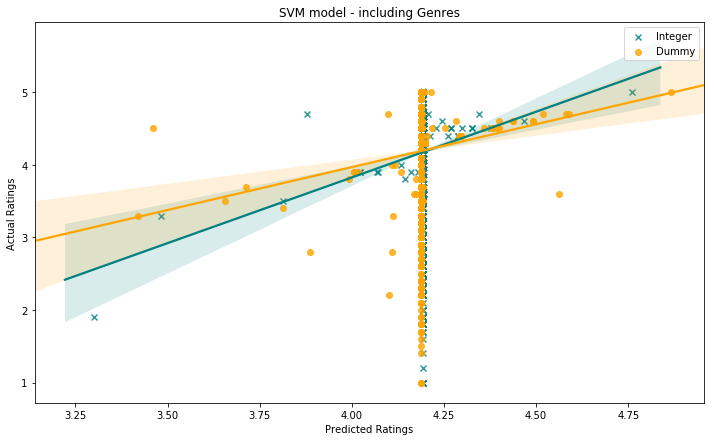

In [111]:
plt.figure(figsize=(12,7))
sns.regplot(Results2a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [112]:
print ('Integer encoding(mean) :' + str(Results2a.mean()))
print ('Dummy encoding(mean) :'+ str(Results2a_d.mean()))
print ('Integer encoding(std) :' + str(Results2a.std()))
print ('Dummy encoding(std) :'+ str(Results2a_d.std()))

Integer encoding(mean) :4.193958080548842
Dummy encoding(mean) :4.189332793207465
Integer encoding(std) :0.028625871128638004
Dummy encoding(std) :0.037220991037883254


#### Now, the dummy encoding model seems to be performing better.
#### Furthermore, the std of the dummy encoded model has fallen significantly, and now has a higher mean compared to the integer encoded model.
## Random Forest Regression Model

### Excluding Genres_c
#### Integer encoding

In [113]:
X = app.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
accuracy = model3.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 7.27%'

#### adding results into results dataframe 

In [115]:
Results3 = model3.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

#### dummy encoding

In [116]:
X_d = app2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3_d = RandomForestRegressor()
model3_d.fit(X_train_d,y_train_d)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [117]:
accuracy = model3_d.score(X_test_d,y_test_d)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 4.66%'

#### adding results into results dataframe

In [118]:
Results3_d = model3_d.predict(X_test_d)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)

#### plot

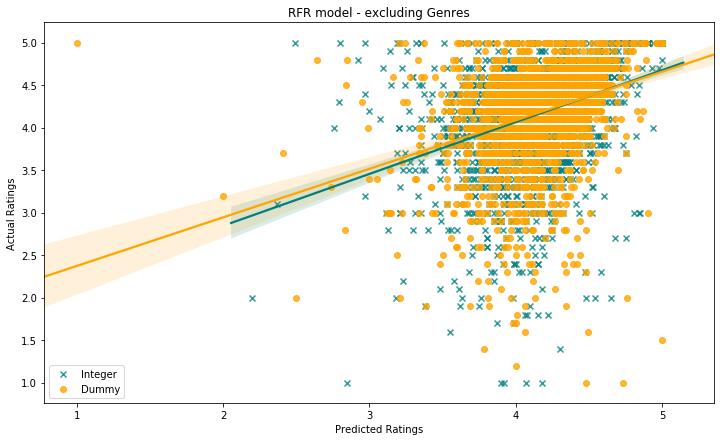

In [119]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [120]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.175318829707427
Dummy encoding(mean) :4.189782445611402
Integer encoding(std) :0.3078941243690532
Dummy encoding(std) :0.29726287858840894


#### Overall both models, the integer and the dummy encoded models are similar, although the dummy encoded model has a higher overall predicted mean
#### Feature Importance - For Integer

<Figure size 1008x720 with 0 Axes>

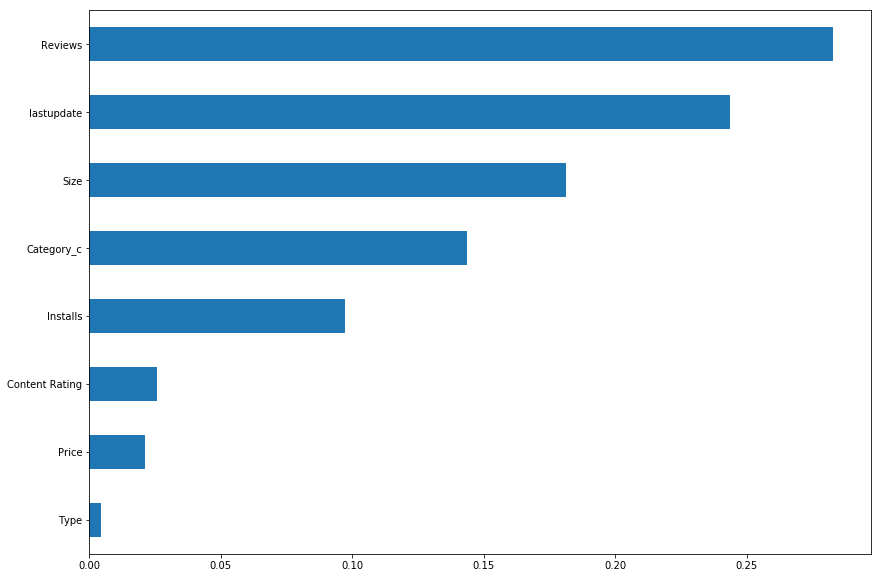

In [121]:
Feat_impt = {}
for col,feat in zip(X.columns,model3.feature_importances_):
    Feat_impt[col] = feat
Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)
plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

#### According to this graph, we can see that the top 4 being reviews, size, caregory and number of installs.
#### Feature Importance - For Dummy

<Figure size 1008x720 with 0 Axes>

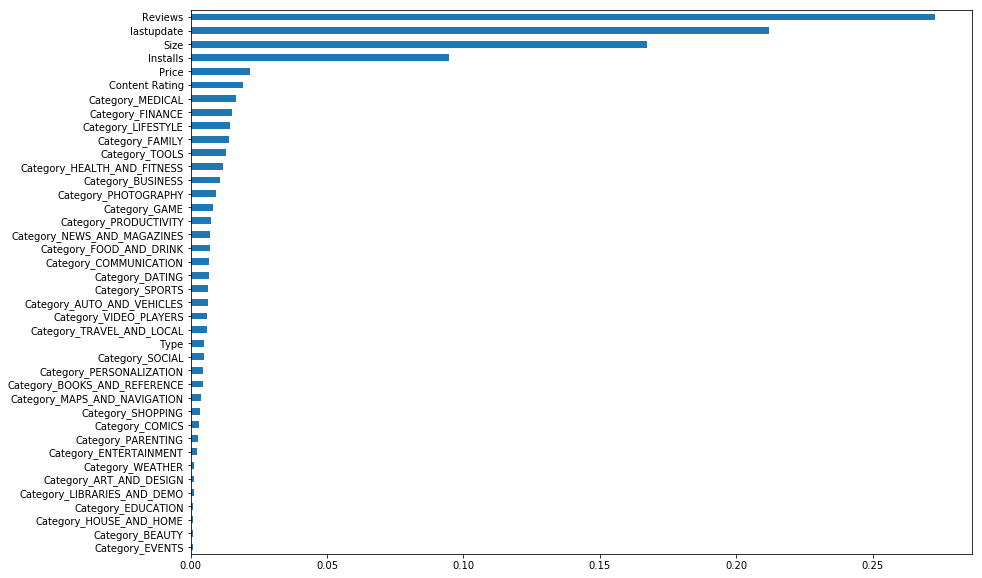

In [122]:
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3_d.feature_importances_):
    Feat_impt_d[col] = feat
Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

#### According to this graph, we can see reviews, size, installs remain as a signigicant contributers to the predictiveness of ratings
### Including Genres_c
#### Integer encoding

In [123]:
X = app.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = app.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3a = RandomForestRegressor()
model3a.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### adding results into results dataframe

In [124]:
Results3a = model3a.predict(X_test)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)

#### dummy encoding

In [125]:
X_d = app2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = app2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3a_d = RandomForestRegressor()
model3a_d.fit(X_train_d,y_train_d)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### adding results into results dataframe¶

In [126]:
Results3a_d = model3a_d.predict(X_test_d)
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a_d, name = 'RFR(inc Genres) - Dummy'),ignore_index = True)

#### plot

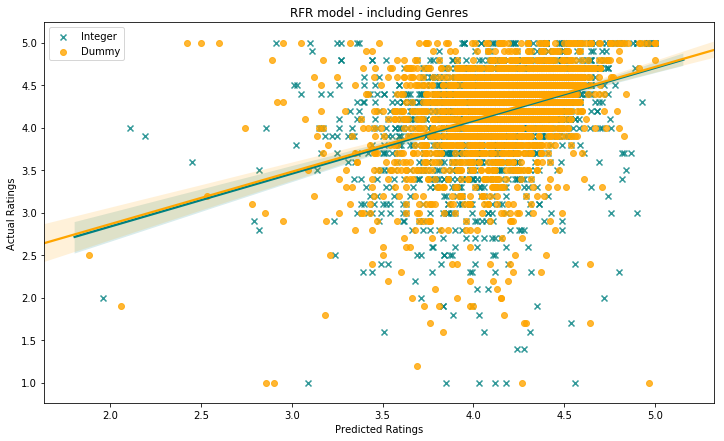

In [127]:
plt.figure(figsize=(12,7))
sns.regplot(Results3a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [128]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.175318829707427
Dummy encoding(mean) :4.189782445611402
Integer encoding(std) :0.3078941243690532
Dummy encoding(std) :0.29726287858840894


#### The results don't seem to defer significantly as compared to the previous results.
#### Feature Importance - For Integer

<Figure size 1008x720 with 0 Axes>

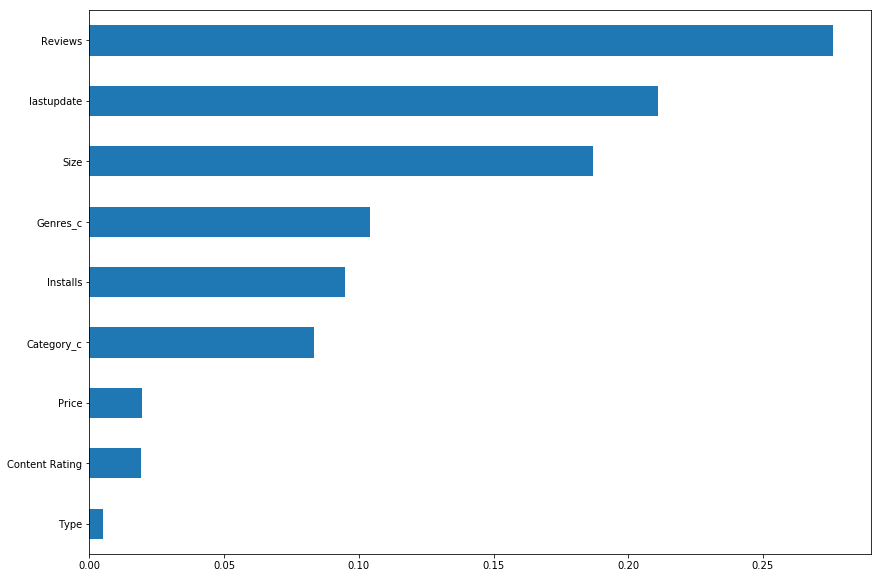

In [129]:
Feat_impt = {}
for col,feat in zip(X.columns,model3a.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

#### According to this graph, genre section plays an important role in the decision tree making. Yet the exclusion of it doesn't seem to significantly impact results. 
#### Feature Importance - for dummy

<Figure size 1008x720 with 0 Axes>

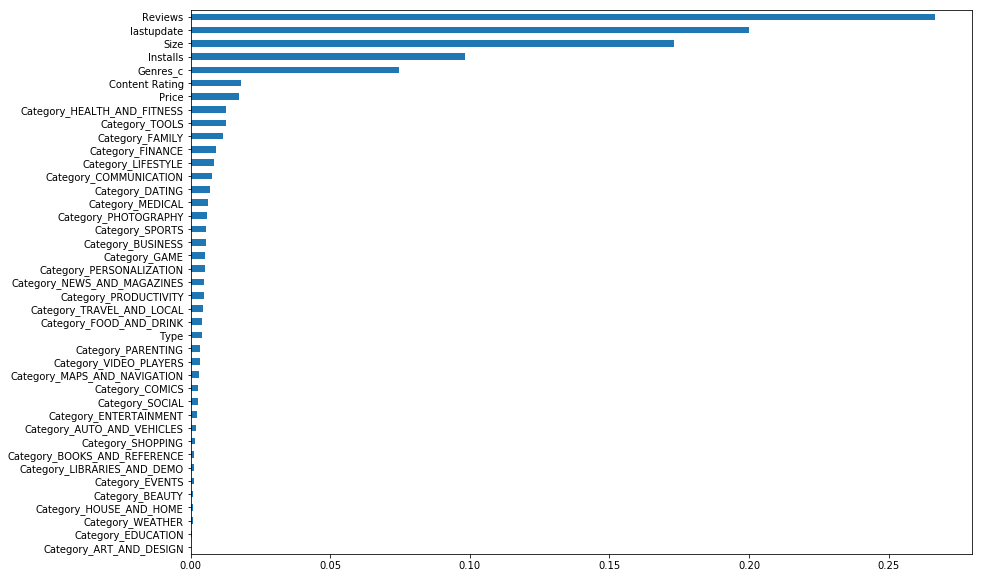

In [130]:
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3a_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

#### According to this graph, it seems that reviews, size, innstalls and genres_c are the siginificant features.
# Results

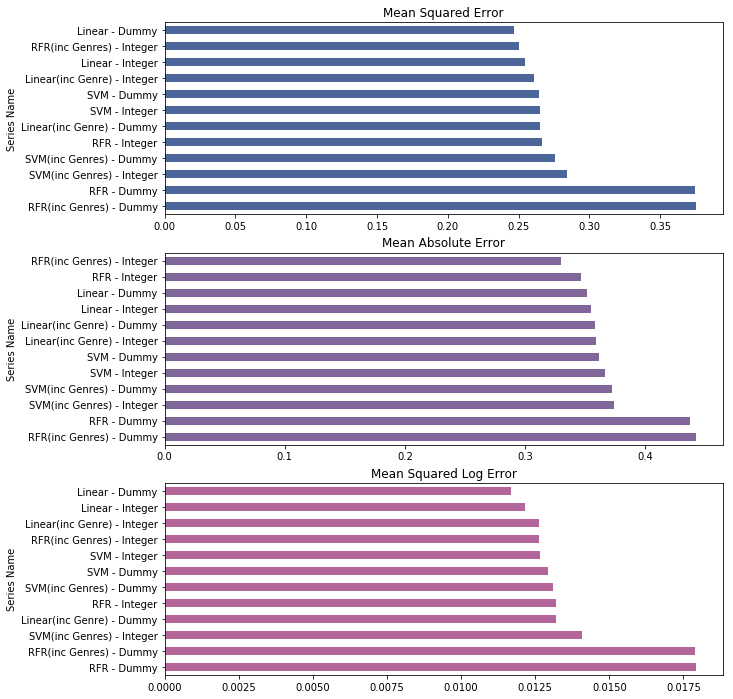

In [131]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()

## Conclusion for now
### Analyzing the errors:
#### The dummy encoded SVM model including genres has the lowest overall error rates, followed by the integer encoded Random Forest Tree model including genes. Yet, all models are very close in terms of it's error term
### Analyzing the accuracies:
#### We can see that the random forest model have the best accuracy among all these models
### Since the accuracies among these models are not good, we guess it is not good to simply remove all these na values and duplicates and transform those categorical variables into numeric variables to do prediction. Thus, we next try random forest model to do prediction
# Prediction - Second Try

In [132]:
df=pd.read_csv("googleplaystore.csv")
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

## Data Re-Exploration and Cleaning

In [133]:
df.head()
# Executing the above script will display the first five rows of the dataset as shown below

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [134]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

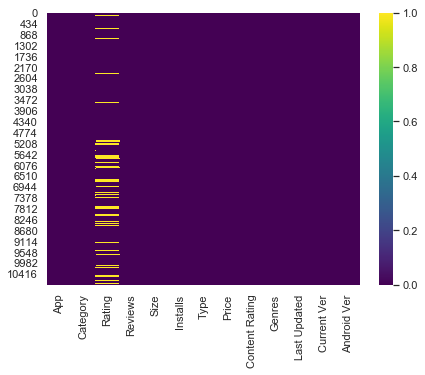

In [135]:
# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [136]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### There are two strategies to handle missing data, either removing records with these missing values or replacing missing values with a specific value like (mean, median or mode) value of the column.

In [137]:
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [138]:
# Count the number of unique values in category column 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [139]:
# Check the record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [140]:
# Like before, drop this bad record
df = df.drop(i)

In [141]:
# Removing NaN values
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null float64
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

## Categorical Data Encoding
#### Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numircal variables.

In [142]:
# App values encoding
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [143]:
# Category features encoding
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [144]:
# Genres features encoding
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [145]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [146]:
# Price cealning
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [147]:
# Installs cealning
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [148]:
# Type encoding
df['Type'] = pd.get_dummies(df['Type'])

In [149]:
# Last Updated encoding
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [150]:
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [151]:
# Size cleaning
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 46 columns):
App                        10840 non-null int32
Category                   10840 non-null object
Rating                     10840 non-null float64
Reviews                    10840 non-null object
Size                       10840 non-null float64
Installs                   10840 non-null object
Type                       10840 non-null int64
Price                      10840 non-null object
Content Rating             10840 non-null int32
Genres                     10840 non-null int32
Last Updated               10840 non-null float64
Current Ver                10840 non-null float64
Android Ver                10838 non-null object
cat_ART_AND_DESIGN         10840 non-null int64
cat_AUTO_AND_VEHICLES      10840 non-null int64
cat_BEAUTY                 10840 non-null int64
cat_BOOKS_AND_REFERENCE    10840 non-null int64
cat_BUSINESS               10840 non-null int64
cat_COMICS    

In [153]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6962,ART_AND_DESIGN,4.1,159,19.0,10000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,2632,ART_AND_DESIGN,3.9,967,14.0,500000,1,0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,8656,ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,7827,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,7022,ART_AND_DESIGN,4.3,967,2.8,100000,1,0,1,11,...,0,0,0,0,0,0,0,0,0,0


## Evaluation Procedure
#### In this section shows how k-nearest neighbors and random forests can be used to predict app ratings based on the other matrices. First, the dataset has to separate into dependent and independent variables (or features and labels). Then those variables have to split into a training and test set.
#### During training stage we give the model both the features and the labels so it can learn to classify points based on the features.

In [154]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

#### The above script splits the dataset into 85% train data and 25% test data.
## K-Nearest Neighbors Model
#### The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its "nearest neighbors".

In [156]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [157]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [158]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.22%'

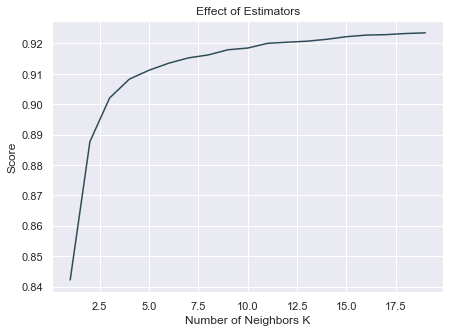

In [159]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

## Random Forest Model
#### The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest.

[(10, 0.9309359872124486),
 (20, 0.9349547332603174),
 (30, 0.9363754055708886),
 (40, 0.9380993536152237),
 (50, 0.9369928891669467),
 (60, 0.937383627291135),
 (70, 0.9382857802684916),
 (80, 0.9376134840350231),
 (90, 0.9378139714981409),
 (100, 0.9374558306042295),
 (110, 0.9379886881156424),
 (120, 0.9374962115509972),
 (130, 0.9378312757654191),
 (140, 0.9385027697389611),
 (150, 0.9384072198695284),
 (160, 0.9375889239459487),
 (170, 0.9381387660834342),
 (180, 0.938430253826338),
 (190, 0.9380981276306234)]

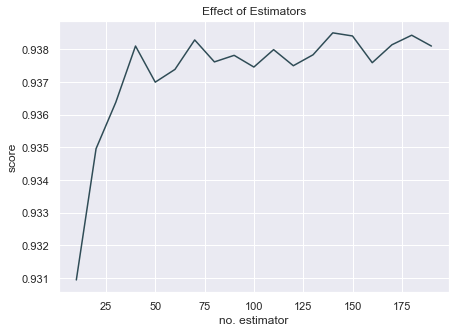

In [160]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [161]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.2423295785589436)

In [162]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.16151888389160898)

In [163]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4018941202501089)

In [164]:
# Calculate the mean accuracy of the RFR model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 93.81%'

# Conclusion
### From here we can see, this model has a great accuracy and error terms. Thus, we finally choose this mdel to finish the rating prediction.